We are using naive bayes classifier to classify binary, multiclass or categorically skewed data

# Tools

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

# Dataset

In [2]:
dataset = pd.read_csv("data.csv")
dataset.head(10)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
5,12.45,15.70,82.57,477.1,0.12780,0
6,18.25,19.98,119.60,1040.0,0.09463,0
7,13.71,20.83,90.20,577.9,0.11890,0
8,13.00,21.82,87.50,519.8,0.12730,0
9,12.46,24.04,83.97,475.9,0.11860,0


# Basic EDA

<AxesSubplot:>

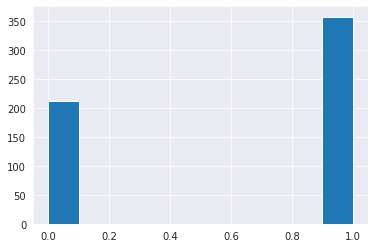

In [3]:
dataset["diagnosis"].hist()

<AxesSubplot:>

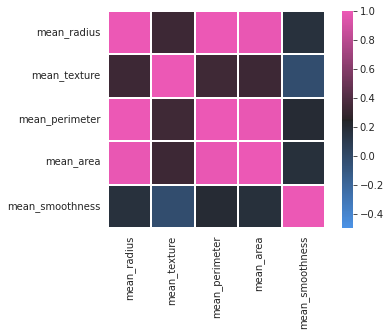

In [4]:
# Pearson Correlation Plot
corr = dataset.iloc[:,:-1].corr(method="pearson")

# color map
cmap = sns.diverging_palette(250,334,80,60,center='dark',as_cmap=True)

# Heatmap
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)

Feature Selection

In [5]:
dataset = dataset[["mean_radius", "mean_texture", "mean_smoothness", "diagnosis"]]
dataset.head(10)

,mean_radius,mean_texture,mean_smoothness,diagnosis
0,17.99,10.38,0.11840,0
1,20.57,17.77,0.08474,0
2,19.69,21.25,0.10960,0
3,11.42,20.38,0.14250,0
4,20.29,14.34,0.10030,0
5,12.45,15.70,0.12780,0
6,18.25,19.98,0.09463,0
7,13.71,20.83,0.11890,0
8,13.00,21.82,0.12730,0
9,12.46,24.04,0.11860,0


Histogram Plots after feature selection

<AxesSubplot:xlabel='mean_texture', ylabel='Count'>

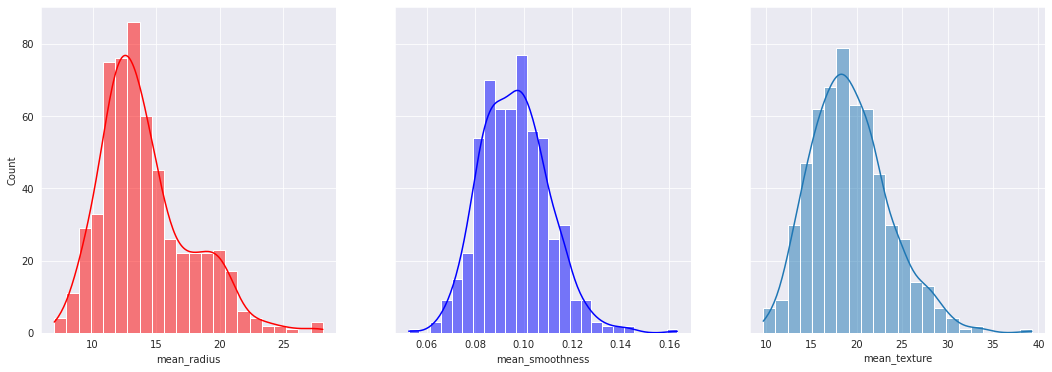

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.histplot(dataset, ax=axes[0], x="mean_radius", kde=True, color='r')
sns.histplot(dataset,ax=axes[1], x="mean_smoothness", kde=True, color='b')
sns.histplot(dataset, ax=axes[2], x="mean_texture", kde=True)

# Calculations for naive bayes formula

In [ ]:
def calculate_prior(df, Y):
  classes = sorted(list(df[Y].unique()))
  prior = []
  for i in classes:
    prior.append(len(df[df[Y]==i])/len(df))
  return prior